In [8]:
import networkx as nx
from scipy.sparse.linalg import svds
import numpy as np
import ast
from bionev.OpenNE import gf, grarep,graph, hope, lap, line, node2vec, sdne
from bionev.OpenNE import hope,gf,grarep,lap,sdne,graph

from bionev.evaluation import LinkPrediction, NodeClassification
#from bionev.embed_train import embedding_training, load_embedding, read_node_labels, split_train_test_graph
from bionev.SVD.model import SVD_embedding
from bionev.utils import *
import matplotlib.pyplot as plt
#from Drugbank import *


import time
import sys,os
import os
Homedir = os.getcwd()

train_graph_filename= "C:/git/DMPrj/data/DrugBank_DDI/DrugBank_DDI.edgelist"
#train_graph_filename= "C:/git/BioNEV/data/DrugBank_DDI/Karate.edgelist"
SVD_OutputFile = "C:/git/DMPrj/Embeddings/PRJ_SVD_OutputFile"
LAPLACIAN_OutputFile = "C:/git/DMPrj/Embeddings/PRJ_Laplacian_OutputFile"
HOPE_OutputFile = "C:/git/DMPrj/Embeddings/PRJ_HOPE_OutputFile"
LINE_Classification_OutputFile = "C:/git/DMPrj/Embeddings/PRJ_LINE_CLASS_OutputFile"
SDNE_OutputFile = "C:/git/DMPrj/Embeddings/PRJ_SDNE_OutputFile"
NODE2VEC_OutputFile = "C:/git/DMPrj/Embeddings/PRJ_node2vec_OutputFile"
NODE2VEC_OutputFile2 = "C:/git/DMPrj/Embeddings/PRJ_node2vec_OutputFile2"
NODE2VEC_OutputFile3 = "C:/git/DMPrj/Embeddings/PRJ_node2vec_OutputFile3"

_results = dict(
        )

    drugbank_id_x          name            type                    groups  \
139       DB00035  Desmopressin  small molecule                  approved   
140       DB00035  Desmopressin  small molecule                  approved   
143       DB00035  Desmopressin  small molecule                  approved   
391       DB00091  Cyclosporine  small molecule  approved|investigational   
392       DB00091  Cyclosporine  small molecule  approved|investigational   

           atc_codes                                         categories  \
139          H01BA02       Antidiuretic Agents|Hemostatics|Renal Agents   
140          H01BA02       Antidiuretic Agents|Hemostatics|Renal Agents   
143          H01BA02       Antidiuretic Agents|Hemostatics|Renal Agents   
391  L04AD01|S01XA18  Antirheumatic Agents|Dermatologic Agents|Immun...   
392  L04AD01|S01XA18  Antirheumatic Agents|Dermatologic Agents|Immun...   

                                 inchikey  \
139  InChIKey=NFLWUMRGJYTJIN-NXBWRCJVSA-N

In [ ]:
import pixiedust
pixiedust.optOut()
display(dfdrugbank2)



In [9]:
split_train_graph= "C:/git/DMPrj/data/DrugBank_DDI/DrugBank_DDI.edgelist"
G, G_train, testing_pos_edges, train_graph_filename = split_train_test_graph(train_graph_filename, None, weighted=None)


Original Graph: nodes: 2191 edges: 242027
Training Graph: nodes: 2191 edges: 193646


In [22]:
g = read_for_SVD(train_graph_filename, weighted=False)
SVD_embedding(g, SVD_OutputFile, size=100)
# size=100
# output_filename = SVD_OutputFile
# node_list = list(g.nodes())
# adjacency_matrix = nx.adjacency_matrix(G, node_list)
# adjacency_matrix = adjacency_matrix.astype(float)
# # adjacency_matrix = sparse.csc_matrix(adjacency_matrix)
# U, Sigma, VT = svds(adjacency_matrix, k=size)
# Sigma = np.diag(Sigma)
# W = np.matmul(U, np.sqrt(Sigma))
# C = np.matmul(VT.T, np.sqrt(Sigma))
# # print(np.sum(U))
# embeddings = W + C
# vectors = {}
# for id, node in enumerate(node_list):
#     vectors[node] = list(np.array(embeddings[id]))
#
# fout = open(output_filename, 'w')
# node_num = len(vectors.keys())
# fout.write("{} {}\n".format(node_num, size))
# for node, vec in vectors.items():
#     fout.write("{} {}\n".format(node,
#                                 ' '.join([str(x) for x in vec])))
# fout.close()


In [62]:
g = read_for_SVD(train_graph_filename, weighted=False)
SVD_embedding(g, SVD_OutputFile, size=100)

embedding_look_up = load_embedding(SVD_OutputFile)
result = LinkPrediction(embedding_look_up, G, G_train, testing_pos_edges,0)
auc_roc, auc_pr, accuracy, f1 = result
_results['results_SVD'] = dict(
                auc_roc=auc_roc,
                auc_pr=auc_pr,
                accuracy=accuracy,
                f1=f1,
            )
print(_results)

Nodes with embedding: 2191
######### Link Prediction Performance #########
AUC-ROC: 0.921, AUC-PR: 0.910, Accuracy: 0.839, F1: 0.839
##################################################
{'results_SVD': {'auc_roc': 0.9205100348039769, 'auc_pr': 0.910475455867572, 'accuracy': 0.8391798367937197, 'f1': 0.839201429412433}}


In [63]:
print(_results)

{'results_SVD': {'auc_roc': 0.9205100348039769, 'auc_pr': 0.910475455867572, 'accuracy': 0.8391798367937197, 'f1': 0.839201429412433}}


In [65]:
g = read_for_OpenNE(train_graph_filename, weighted=None)
model = hope.HOPE(g, 100)
model.save_embeddings(HOPE_OutputFile)

embedding_look_up = load_embedding(HOPE_OutputFile)
result = LinkPrediction(embedding_look_up, G, G_train, testing_pos_edges,0)
auc_roc, auc_pr, accuracy, f1 = result
_results['results_HOPE'] = dict(
                auc_roc=auc_roc,
                auc_pr=auc_pr,
                accuracy=accuracy,
                f1=f1,
            )
print(_results)


Loading training graph for learning embedding...
Graph Loaded...
Nodes with embedding: 2191
######### Link Prediction Performance #########
AUC-ROC: 0.925, AUC-PR: 0.914, Accuracy: 0.846, F1: 0.847
##################################################
{'results_SVD': {'auc_roc': 0.9205100348039769, 'auc_pr': 0.910475455867572, 'accuracy': 0.8391798367937197, 'f1': 0.839201429412433}, 'results_HOPE': {'auc_roc': 0.9253347000170004, 'auc_pr': 0.9138643318115764, 'accuracy': 0.8459043487243053, 'f1': 0.8473705749948844}}


Nodes with embedding: 2191
######### Link Prediction Performance #########
AUC-ROC: 0.926, AUC-PR: 0.914, Accuracy: 0.846, F1: 0.848
##################################################
{'results': {'auc_roc': 0.9255487049587128, 'auc_pr': 0.9136624419759092, 'accuracy': 0.8461006094411734, 'f1': 0.847591476825189}}


c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [66]:
g = read_for_OpenNE(train_graph_filename, weighted=None)
model = lap.LaplacianEigenmaps(g, rep_size=100)
model.save_embeddings(LAPLACIAN_OutputFile)

embedding_look_up = load_embedding(LAPLACIAN_OutputFile)
result = LinkPrediction(embedding_look_up, G, G_train, testing_pos_edges,0)
auc_roc, auc_pr, accuracy, f1 = result
_results['results_LaplacianEigenmaps'] = dict(
                auc_roc=auc_roc,
                auc_pr=auc_pr,
                accuracy=accuracy,
                f1=f1,
            )
print(_results)

Loading training graph for learning embedding...
Graph Loaded...
begin norm_lap_mat
finish norm_lap_mat
finish getLap...
finish eigh(lap_mat)...
Nodes with embedding: 2191
######### Link Prediction Performance #########
AUC-ROC: 0.797, AUC-PR: 0.753, Accuracy: 0.717, F1: 0.726
##################################################
{'results_SVD': {'auc_roc': 0.9205100348039769, 'auc_pr': 0.910475455867572, 'accuracy': 0.8391798367937197, 'f1': 0.839201429412433}, 'results_HOPE': {'auc_roc': 0.9253347000170004, 'auc_pr': 0.9138643318115764, 'accuracy': 0.8459043487243053, 'f1': 0.8473705749948844}, 'results_LaplacianEigenmaps': {'auc_roc': 0.7965015224159093, 'auc_pr': 0.7531693556677534, 'accuracy': 0.7170436938332817, 'f1': 0.7260836958152093}}


c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Nodes with embedding: 2191
######### Link Prediction Performance #########
AUC-ROC: 0.790, AUC-PR: 0.747, Accuracy: 0.713, F1: 0.723
##################################################
{'results': {'auc_roc': 0.7899242409668337, 'auc_pr': 0.7466999880131888, 'accuracy': 0.7126949695279413, 'f1': 0.7231225611212868}}


c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
import ast
g = read_for_OpenNE(train_graph_filename, weighted=None)
encoder_layer_list = ast.literal_eval('[1000, 128]')
model = sdne.SDNE(g, encoder_layer_list=encoder_layer_list,
                              alpha=0.3, beta=0, nu1=1e-5, nu2=1e-4,
                              batch_size=200, epoch=200, learning_rate=0.01)
model.save_embeddings(SDNE_OutputFile)

embedding_look_up = load_embedding(SDNE_OutputFile)
result = LinkPrediction(embedding_look_up, G, G_train, testing_pos_edges,0)
auc_roc, auc_pr, accuracy, f1 = result
_results['results_SDNE'] = dict(
                auc_roc=auc_roc,
                auc_pr=auc_pr,
                accuracy=accuracy,
                f1=f1,
            )
print(_results)


Loading training graph for learning embedding...
Graph Loaded...
total iter: 2191
step 0: total loss: 273393.47, l1 loss: 434840.12, l2 loss: 142940.05
step 50: total loss: 3466960.2, l1 loss: 7909614.0, l2 loss: 1094073.2
step 100: total loss: 433145.1, l1 loss: 1338546.0, l2 loss: 31578.34
step 150: total loss: 54481.797, l1 loss: 165736.52, l2 loss: 4757.884
step 200: total loss: 530112.56, l1 loss: 1405555.0, l2 loss: 108443.05
step 250: total loss: 814271.3, l1 loss: 2647800.0, l2 loss: 19928.158
step 300: total loss: 45460.133, l1 loss: 137978.19, l2 loss: 4063.6428
step 350: total loss: 85818.53, l1 loss: 281510.94, l2 loss: 1362.2308
step 400: total loss: 15837.343, l1 loss: 50318.625, l2 loss: 738.7417
step 450: total loss: 15029.827, l1 loss: 48288.547, l2 loss: 540.26245
step 500: total loss: 40313.79, l1 loss: 130247.48, l2 loss: 1236.5481
step 550: total loss: 10104.907, l1 loss: 32668.588, l2 loss: 301.33853
step 600: total loss: 6574.148, l1 loss: 21338.994, l2 loss: 169

c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [76]:
#print(_results)
for i in _results:
    print (i)
    print(_results[i])

results_SVD
{'auc_roc': 0.9205100348039769, 'auc_pr': 0.910475455867572, 'accuracy': 0.8391798367937197, 'f1': 0.839201429412433}
results_HOPE
{'auc_roc': 0.9253347000170004, 'auc_pr': 0.9138643318115764, 'accuracy': 0.8459043487243053, 'f1': 0.8473705749948844}
results_LaplacianEigenmaps
{'auc_roc': 0.7965015224159093, 'auc_pr': 0.7531693556677534, 'accuracy': 0.7170436938332817, 'f1': 0.7260836958152093}
results_SDNE
{'auc_roc': 0.8899705610525179, 'auc_pr': 0.8701687358744669, 'accuracy': 0.8105154426195641, 'f1': 0.8149127232368076}


In [9]:
#################TESTING PURPOSE  ########################################################
g = read_for_OpenNE(train_graph_filename, weighted=None)
model = lap.LaplacianEigenmaps(g, rep_size=100)
model.save_embeddings(LAPLACIAN_OutputFile)

Loading training graph for learning embedding...
Graph Loaded...
begin norm_lap_mat
finish norm_lap_mat
finish getLap...


c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\scipy\sparse\linalg\eigen\arpack\arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  RuntimeWarning)


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [5]:
g = read_for_OpenNE(train_graph_filename, weighted=None)
from bionev.OpenNE import node2vec
model = node2vec.Node2vec(g,path_length=10,num_paths=5,dim=100,workers=8,p=1,q=1,window=10)
model.save_embeddings("C:/git/DMPrj/embeddings/NODE2VECTest2_OutputFile")
print('tests')

#model.save_embeddings(NODE2VEC_OutputFile)
print("test1")

Loading training graph for learning embedding...
Graph Loaded...
Parameters path_length, num_paths, p, q, workers: 10 5 1 1 8
Preprocess transition probs...
Begin random walk...
Walk finished...
Learning representation...
tests
test1


In [5]:
#model = node2vec.Node2vec(graph=G_, path_length=args.walk_length,
#                                      num_paths=args.number_walks, dim=args.dimensions,
#                                      workers=args.workers, window=args.window_size, dw=True)



train_graph_filename= "C:/git/DMPrj/data/DrugBank_DDI/DrugBank_DDI.edgelist"
#train_graph_filename= "C:/git/BioNEV/data/DrugBank_DDI/Karate.edgelist"

from bionev.OpenNE import gf, grarep,graph, hope, lap, line, node2vec, sdne
from bionev.OpenNE import node2vec

g = read_for_OpenNE(train_graph_filename, weighted=None)
from bionev.OpenNE import node2vec
model = node2vec.Node2vec(g,path_length=10,num_paths=5,dim=100,workers=8,p=1,q=1,window=10)
model.save_embeddings(NODE2VEC_OutputFile3)


Loading training graph for learning embedding...
Graph Loaded...
Parameters path_length, num_paths, p, q, workers: 10 5 1 1 8
Preprocess transition probs...


KeyboardInterrupt: 

In [7]:
#dfdrugbank_filename=os.path.join(Homedir, '../data/drugbank.tsv')
#print(dfdrugbank_filename)

#################TESTING PURPOSE  ########################################################

C:\git\DMPrj\src\../data/drugbank.tsv


    drugbank_id_x          name            type                    groups  \
139       DB00035  Desmopressin  small molecule                  approved   
140       DB00035  Desmopressin  small molecule                  approved   
143       DB00035  Desmopressin  small molecule                  approved   
391       DB00091  Cyclosporine  small molecule  approved|investigational   
392       DB00091  Cyclosporine  small molecule  approved|investigational   

           atc_codes                                         categories  \
139          H01BA02       Antidiuretic Agents|Hemostatics|Renal Agents   
140          H01BA02       Antidiuretic Agents|Hemostatics|Renal Agents   
143          H01BA02       Antidiuretic Agents|Hemostatics|Renal Agents   
391  L04AD01|S01XA18  Antirheumatic Agents|Dermatologic Agents|Immun...   
392  L04AD01|S01XA18  Antirheumatic Agents|Dermatologic Agents|Immun...   

                                 inchikey  \
139  InChIKey=NFLWUMRGJYTJIN-NXBWRCJVSA-N

In [77]:


import pandas as pd


dfdrugbank_filename=os.path.join(Homedir, '../data/drugbank.tsv')
dfprotein_filename=os.path.join(Homedir, '../data/proteins.tsv')


dfdrugbank = pd.read_csv(dfdrugbank_filename, delimiter="\t")
dfprotein = pd.read_csv(dfprotein_filename, delimiter="\t")
dfdrugbank['DrugBank_id'] = dfdrugbank['drugbank_id']
dfprotein['DrugBank_id'] = dfprotein['drugbank_id']
dfnodes = pd.read_csv("../data/DrugBank_DDI/node_list.txt", delimiter="	")
dfnodes['ID'] = dfnodes.index
dfnodes['NODEID'] = dfnodes['ID']
dfnodes['WEIGHT'] = 0
dfdrugbank2 = dfdrugbank.merge(dfnodes, how="left", on="DrugBank_id")
dfdrugbank2 = dfdrugbank2.merge(dfprotein, how="left", on="DrugBank_id")
#dfdrugbank3 = dfdrugbank2[str(dfdrugbank2['ID'])!="nan"]
dfdrugbank2.dropna(inplace=True)
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
dfdrugbank2["category_code"] = lb_make.fit_transform(dfdrugbank2["category"])
dfdrugbank2["actions_code"] = lb_make.fit_transform(dfdrugbank2["actions"])
dfdrugbank2["organism_code"] = lb_make.fit_transform(dfdrugbank2["organism"])
dfdrugbank2["groups_code"] = lb_make.fit_transform(dfdrugbank2["groups"])
dfdrugbank2['ID'] = dfdrugbank2['ID'].astype(int)
print(dfdrugbank2.head(5))
print(dfdrugbank2.columns)


    drugbank_id_x          name            type                    groups  \
139       DB00035  Desmopressin  small molecule                  approved   
140       DB00035  Desmopressin  small molecule                  approved   
143       DB00035  Desmopressin  small molecule                  approved   
391       DB00091  Cyclosporine  small molecule  approved|investigational   
392       DB00091  Cyclosporine  small molecule  approved|investigational   

           atc_codes                                         categories  \
139          H01BA02       Antidiuretic Agents|Hemostatics|Renal Agents   
140          H01BA02       Antidiuretic Agents|Hemostatics|Renal Agents   
143          H01BA02       Antidiuretic Agents|Hemostatics|Renal Agents   
391  L04AD01|S01XA18  Antirheumatic Agents|Dermatologic Agents|Immun...   
392  L04AD01|S01XA18  Antirheumatic Agents|Dermatologic Agents|Immun...   

                                 inchikey  \
139  InChIKey=NFLWUMRGJYTJIN-NXBWRCJVSA-N

In [78]:
dfdrugbankdata=dfdrugbank2[['ID','category_code']]
dfdrugbankdata=dfdrugbank2[['ID','actions_code']]
dfdrugbankdata=dfdrugbank2[['ID','organism_code']]
dfdrugbankdata.to_csv("C:/git/DMPrj/data/DrugBank_DDI/DrugBankNodeClass.csv",index=False, sep=" ", header = False)
EdgeList=pd.read_csv("C:/git/DMPrj/data/DrugBank_DDI/DrugBank_DDI.edgelist", delimiter=" ")
EdgeList['Weight']=1
EdgeList.to_csv("C:/git/DMPrj/data/DrugBank_DDI/DrugBank_DDI2.edgelist",index=False, sep=" ", header = False)


train_graph_filename= "C:/git/DMPrj/data/DrugBank_DDI/DrugBank_DDI2.edgelist"
#train_graph_filename= "C:/git/BioNEV/data/DrugBank_DDI/Karate.edgelist"

Sat Jun  6 13:38:16 2020


In [79]:
#train_graph_filename="C:/git/DMPrj/data/Clin_Term_COOC/Clin_Term_COOC.edgelist"
#label_file="C:/git/DMPrj/data/Clin_Term_COOC/Clin_Term_COOC_labels.txt"

train_graph_filename=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBank_DDI2.edgelist')
label_file=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBankNodeClass.csv')

#train_graph_filename= "C:/git/DMPrj/data/DrugBank_DDI/DrugBank_DDI.edgelist"
#train_graph_filename= "C:/git/BioNEV/data/DrugBank_DDI/Karate.edgelist"

In [35]:
##############                            Node2vec model               ##################
import time
print(time.ctime())
#g = read_for_OpenNE(train_graph_filename, weighted=args.weighted)
#embedding_training(args, train_graph_filename)
#embedding_look_up = load_embedding(LINE_Classification_OutputFile, node_list)
#######################
import time
#model = line.LINE(G_, epoch=args.epochs,rep_size=args.dimensions, order=args.order)
#model = gf.GraphFactorization(G_, rep_size=args.dimensions,
#                                          epoch=args.epochs, learning_rate=args.lr, weight_decay=args.weight_decay)
#model = node2vec.Node2vec(graph=G_, path_length=args.walk_length,
#                                      num_paths=args.number_walks, dim=args.dimensions,
#                                      workers=args.workers, window=args.window_size, dw=True)


#train_graph_filename=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBank_DDI2.edgelist')
#label_file=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBankNodeClass.csv')
node_list, labels = read_node_labels(label_file)
time1 = time.time()
g = read_for_OpenNE(train_graph_filename, weighted=True)
#model = line.LINE(g, epoch=5,rep_size=100, order=2)
model = node2vec.Node2vec(graph=g, path_length=10,
                                      num_paths=5, dim=100,
                                      workers=8, window=10, dw=False)
EmbedFileN2V=os.path.join(Homedir, '../embeddings/node2vec_DrugBank_DDICLASS_EMBED.txt')
model.save_embeddings(EmbedFileN2V)
embedding_look_up = load_embedding(EmbedFileN2V, node_list)
result = NodeClassification(embedding_look_up, node_list, labels, 0.2, 0)
print("Representations Completed")

Wed Jun 10 19:45:00 2020
Nodes with labels: 6807
Loading training graph for learning embedding...
Graph Loaded...
Parameters path_length, num_paths, p, q, workers: 10 5 1.0 1.0 8
Preprocess transition probs...


KeyboardInterrupt: 

In [6]:
##############                            DeepWalk model               ##################
print(time.ctime())
#g = read_for_OpenNE(train_graph_filename, weighted=args.weighted)
#embedding_training(args, train_graph_filename)
#embedding_look_up = load_embedding(LINE_Classification_OutputFile, node_list)
#######################
#model = line.LINE(G_, epoch=args.epochs,rep_size=args.dimensions, order=args.order)
#model = gf.GraphFactorization(G_, rep_size=args.dimensions,
#                                          epoch=args.epochs, learning_rate=args.lr, weight_decay=args.weight_decay)
#model = node2vec.Node2vec(graph=G_, path_length=args.walk_length,
#                                      num_paths=args.number_walks, dim=args.dimensions,
#                                      workers=args.workers, window=args.window_size, dw=True)

#train_graph_filename=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBank_DDI2.edgelist')
#label_file=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBankNodeClass.csv')
node_list, labels = read_node_labels(label_file)
time1 = time.time()
g = read_for_OpenNE(train_graph_filename, weighted=True)
#model = line.LINE(g, epoch=5,rep_size=100, order=2)
model = node2vec.Node2vec(graph=g, path_length=10,
                                      num_paths=5, dim=100,
                                      workers=8, window=10, dw=True)
EmbedFileDW=os.path.join(Homedir, '../embeddings/DeepWalk_DrugBank_DDICLASS_EMBED.txt')
model.save_embeddings(EmbedFileDW)
embedding_look_up = load_embedding(EmbedFileDW, node_list)
result = NodeClassification(embedding_look_up, node_list, labels, 0.2, 0)
print("Representations Completed")


Mon Jun  8 22:08:41 2020
Nodes with labels: 6807
Loading training graph for learning embedding...
Graph Loaded...
Parameters path_length, num_paths, p, q, workers: 10 5 1.0 1.0 8
Begin random walks...
Walk finished...
Learning representation...
Nodes with embedding: 2191
######### Node Classification Performance #########
Accuracy: 0.996, Micro-F1: 0.882, Macro-F1: 0.171
##################################################
Representations Completed


c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['10', '11', '12', '13', '14', '15', '17', '18', '20', '21', '22', '23', '24', '25', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['11', '14', '16', '17', '19', '21', '23', '24', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


Test


In [5]:
##############                            LINE model               ##################
print(time.ctime())
#g = read_for_OpenNE(train_graph_filename, weighted=args.weighted)
#embedding_training(args, train_graph_filename)
#embedding_look_up = load_embedding(LINE_Classification_OutputFile, node_list)
#######################
#model = line.LINE(G_, epoch=args.epochs,rep_size=args.dimensions, order=args.order)
#model = gf.GraphFactorization(G_, rep_size=args.dimensions,
#                                          epoch=args.epochs, learning_rate=args.lr, weight_decay=args.weight_decay)
#model = node2vec.Node2vec(graph=G_, path_length=args.walk_length,
#                                      num_paths=args.number_walks, dim=args.dimensions,
#                                      workers=args.workers, window=args.window_size, dw=True)

#train_graph_filename=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBank_DDI2.edgelist')
#label_file=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBankNodeClass.csv')
node_list, labels = read_node_labels(label_file)
time1 = time.time()
g = read_for_OpenNE(train_graph_filename, weighted=True)
model = line.LINE(g, epoch=5,rep_size=100, order=2)

EmbedFileLINE=os.path.join(Homedir, '../embeddings/LINE_DrugBank_DDICLASS.txt')
model.save_embeddings(EmbedFileLINE)
embedding_look_up = load_embedding(EmbedFileLINE, node_list)
result = NodeClassification(embedding_look_up, node_list, labels, 0.2, 0)
print("Representations Completed")


Mon Jun  8 22:13:34 2020
Nodes with labels: 6807
Loading training graph for learning embedding...
Graph Loaded...
Pre-procesing for non-uniform negative sampling!

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.







epoch:0 sum of loss:1356.9254209399223
epoch:1 sum of loss:1072.0152559280396
epoch:2 sum of loss:996.252052873373
epoch:3 sum of loss:954.2492750138044
epoch:4 sum of loss:927.5889544710517
Nodes with embedding: 2191
######### Node Classification Performance #########
Accuracy: 0.996, Micro-F1: 0.902, Macro-F1: 0.185
##################################################
Representations Completed


c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['10', '11', '12', '13', '14', '15', '17', '18', '20', '21', '22', '23', '24', '25', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['11', '14', '16', '17', '19', '21', '23', '24', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [33]:
##############                            Graph Factorization               ##################
print(time.ctime())
#g = read_for_OpenNE(train_graph_filename, weighted=args.weighted)
#embedding_training(args, train_graph_filename)
#embedding_look_up = load_embedding(LINE_Classification_OutputFile, node_list)
#######################
#model = line.LINE(G_, epoch=args.epochs,rep_size=args.dimensions, order=args.order)
#model = gf.GraphFactorization(G_, rep_size=args.dimensions,
#                                          epoch=args.epochs, learning_rate=args.lr, weight_decay=args.weight_decay)
#model = node2vec.Node2vec(graph=G_, path_length=args.walk_length,
#                                      num_paths=args.number_walks, dim=args.dimensions,
#                                      workers=args.workers, window=args.window_size, dw=True)

#train_graph_filename=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBank_DDI2.edgelist')
#label_file=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBankNodeClass.csv')
node_list, labels = read_node_labels(label_file)
time1 = time.time()
g = read_for_OpenNE(train_graph_filename, weighted=True)
model = gf.GraphFactorization(g, rep_size=100,
                                          epoch=5, learning_rate=0.2, weight_decay=5e-4)
EmbedFileGF=os.path.join(Homedir, '../embeddings/GF_DrugBank_DDICLASS.txt')
model.save_embeddings(EmbedFileGF)
embedding_look_up = load_embedding(EmbedFileGF, node_list)
result = NodeClassification(embedding_look_up, node_list, labels, 0.2, 0)
print("Representations Completed")



Tue Jun  9 20:31:28 2020
Nodes with labels: 6807
Loading training graph for learning embedding...
Graph Loaded...
total iter: 5
step 0: cost: 419847
Nodes with embedding: 2191
######### Node Classification Performance #########
Accuracy: 0.997, Micro-F1: 0.922, Macro-F1: 0.286
##################################################
Representations Completed


c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['10', '11', '12', '13', '14', '15', '17', '18', '20', '21', '22', '23', '24', '25', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['11', '14', '16', '17', '19', '21', '23', '24', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [34]:
##############                            GraRep               ##################
print(time.ctime())
#model = grarep.GraRep(graph=G_, Kstep=args.kstep, dim=args.dimensions)

#train_graph_filename=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBank_DDI2.edgelist')
#label_file=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBankNodeClass.csv')
node_list, labels = read_node_labels(label_file)
time1 = time.time()
g = read_for_OpenNE(train_graph_filename, weighted=True)
model = grarep.GraRep(graph=g, Kstep=4, dim=100)

EmbedFileGraRep=os.path.join(Homedir, '../embeddings/GraRep_DrugBank_DDICLASS.txt')
model.save_embeddings(EmbedFileGraRep)
embedding_look_up = load_embedding(EmbedFileGraRep, node_list)
result = NodeClassification(embedding_look_up, node_list, labels, 0.2, 0)
print("Representations Completed")

Tue Jun  9 20:31:42 2020
Nodes with labels: 6807
Loading training graph for learning embedding...
Graph Loaded...
Kstep = 0
Kstep = 1
Kstep = 2
Kstep = 3
Nodes with embedding: 2191
######### Node Classification Performance #########
Accuracy: 0.996, Micro-F1: 0.902, Macro-F1: 0.185
##################################################
Representations Completed


C:\git\DMPrj\src\bionev\OpenNE\grarep.py:33: RuntimeWarning: divide by zero encountered in log
  probTranMat = np.log(Ak / tileMat) - np.log(1.0 / self.node_size)
C:\git\DMPrj\src\bionev\OpenNE\grarep.py:33: RuntimeWarning: divide by zero encountered in log
  probTranMat = np.log(Ak / tileMat) - np.log(1.0 / self.node_size)
C:\git\DMPrj\src\bionev\OpenNE\grarep.py:33: RuntimeWarning: divide by zero encountered in log
  probTranMat = np.log(Ak / tileMat) - np.log(1.0 / self.node_size)
C:\git\DMPrj\src\bionev\OpenNE\grarep.py:33: RuntimeWarning: divide by zero encountered in log
  probTranMat = np.log(Ak / tileMat) - np.log(1.0 / self.node_size)
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['10', '11', '12', '13', '14', '15', '17', '18', '20', '21', '22', '23', '24', '25', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.p

In [106]:
##############                           SVD               ##################
print(time.ctime())
#g = read_for_OpenNE(train_graph_filename, weighted=args.weighted)
#embedding_training(args, train_graph_filename)
#embedding_look_up = load_embedding(LINE_Classification_OutputFile, node_list)
#######################
#model = line.LINE(G_, epoch=args.epochs,rep_size=args.dimensions, order=args.order)
#model = gf.GraphFactorization(G_, rep_size=args.dimensions,
#                                          epoch=args.epochs, learning_rate=args.lr, weight_decay=args.weight_decay)
#model = node2vec.Node2vec(graph=G_, path_length=args.walk_length,
#                                      num_paths=args.number_walks, dim=args.dimensions,
#                                      workers=args.workers, window=args.window_size, dw=True)
#SVD_embedding(G_, args.output, size=args.dimensions)
#train_graph_filename=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBank_DDI2.edgelist')
#label_file=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBankNodeClass.csv')
node_list, labels = read_node_labels(label_file)
time1 = time.time()
g = read_for_SVD(train_graph_filename, weighted=True)

EmbedFileSVD=os.path.join(Homedir, '../embeddings/SVD_DrugBank_DDICLASS.txt')

SVD_embedding(g, EmbedFileSVD, size=100)

embedding_look_up = load_embedding(EmbedFileSVD, node_list)
result = NodeClassification(embedding_look_up, node_list, labels, 0.2, 0)
print("Representations Completed")

Wed Jun  3 12:12:48 2020
Nodes with labels: 6807
Nodes with embedding: 2191
######### Node Classification Performance #########
Accuracy: 0.997, Micro-F1: 0.922, Macro-F1: 0.286
##################################################
Representations Completed


c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['10', '11', '12', '13', '14', '15', '17', '18', '20', '21', '22', '23', '24', '25', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['11', '14', '16', '17', '19', '21', '23', '24', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


Mon Jun  1 15:30:19 2020
Nodes with labels: 25120
Loading training graph for learning embedding...
Graph Loaded...

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




total iter: 1


In [ ]:
##########################################      Node2Vec Steps  In Details     ##################################################
import time
from gensim.models import Word2Vec
from bionev.OpenNE import walker
train_graph_filename= "C:/git/DMPrj/data/DrugBank_DDI/DrugBank_DDI.edgelist"

print(time.time())
g = read_for_OpenNE(train_graph_filename, weighted=None)
print("Graph loaded...")

modelwalker = walker.Walker(g, p=1, q=2, workers=8)
print("Preprocess transition probs...")
modelwalker.preprocess_transition_probs()
#sentences = modelwalker.simulate_walks(num_walks=32, walk_length=64)
#sentences = modelwalker.simulate_walks(num_walks=1, walk_length=10)
print("Preprocess transition probs completed...")

print("Preprocess sentences and walks...")
sentences= modelwalker.simulate_walks(num_walks=1, walk_length=10)

print("Preprocess sentences and walks completed...")
kwargs={}
kwargs["sentences"] = sentences
kwargs["min_count"] = 0
kwargs["size"] = 100
kwargs["sg"] = 1

print("Learning representation...")
word2vec = Word2Vec(**kwargs)
vectors = {}
for word in g.G.nodes():
    vectors[word] = word2vec.wv[word]
del word2vec

print("Learning representation completed...")
filename="C:/git/DMPrj/Embeddings/node2vec Embeddings.txt"
fout = open(filename, 'w')
node_num = len(vectors.keys())
fout.write("{} {}\n".format(node_num, 100))
for node, vec in vectors.items():
    fout.write("{} {}\n".format(node,
                                ' '.join([str(x) for x in vec])))
fout.close()
print("Walk Process Completed")
############################################################################################

1590968594.1315007
Loading training graph for learning embedding...
Graph Loaded...
Graph loaded...
Preprocess transition probs...


In [18]:
#################################     Embedding Representations in 2-D   #############################################
import networkx as nx
import numpy as np

EMBED="NODE2VEC_EMBEDDING_FILE"
EMBED="C:/git/BioNEV/embeddings/Laplacian_OutputFile"
EMBED="C:/git/BioNEV/embeddings/HOPE_OutputFile"
EMBED="C:/git/BioNEV/embeddings/NODE2VEC_OutputFile"
#EMBED = SVD_OutputFile
#EMBED = SDNE_OutputFile
#EMBED =NODE2VEC_OutputFile3

EmbedFileDW=os.path.join(Homedir, '../embeddings/DeepWalk_DrugBank_DDICLASS_EMBED.txt')
EMBED="C:/git/BioNEV/embeddings/GF_DrugBank_DDICLASS.txt"
#EMBED = EmbedFileSVD
#EMBED = EmbedFileDW
#EMBED=EmbedFileGF
#EMBED= EmbedFileN2V
EMBED=EmbedFileLINE
EMBED=EmbedFileGraRep
from sklearn.manifold import TSNE


tsne = TSNE(random_state=1, n_iter=15000, metric="cosine")
X = np.loadtxt(EMBED, skiprows=1)
X = np.array([x[1:] for x in X])
Label = np.loadtxt(EMBED, skiprows=1)
Label = np.array([int(x[0]) for x in Label])

import pandas as pd
embs = tsne.fit_transform(X)
df=pd.DataFrame()
df['x'] = embs[:, 0]
df['y'] = embs[:, 1]
df['label'] = list(Label)
print(df.shape)
#print(df['y'])
#print(df['x'])
#print(X[0])

(2191, 3)


C:\git\DMPrj\src\../embeddings/GraRep_DrugBank_DDICLASS.txt


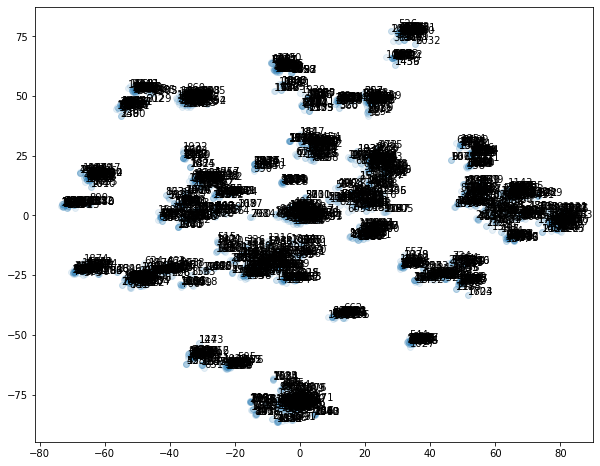

In [19]:
print(EMBED)
import matplotlib.pyplot as plt
FigureFile=EMBED.split("/")[2].split(".")[0]
FS = (10, 8)
fig, ax = plt.subplots(figsize=FS)
# Make points translucent so we can visually identify regions with a high density of overlapping points
ax.scatter(df.x, df.y,label=df.label, alpha=.1);
#ax.legend()
#ax.annotate(df.x, df.y, Label, fontsize=9)
for i, txt in enumerate(Label):
    ax.annotate(txt, (df.x[i], df.y[i]))
plt.savefig("C:/git/DMPrj/embeddings/" + FigureFile + ".png")

In [62]:

print(EMBED.split("/")[2].split(".")[0])

GF_DrugBank_DDICLASS


In [12]:


############################# Node Classfication #################
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix

from bionev.utils import *


def NodeClassification2(embedding_look_up, node_list, labels, testing_ratio, seed):

    X_train, y_train, X_test, y_test = split_train_test_classify(embedding_look_up, node_list, labels,
                                                                 testing_ratio=testing_ratio,seed=seed)
    binarizer = MultiLabelBinarizer(sparse_output=True)
    y_all = np.append(y_train, y_test)
    binarizer.fit(y_all)
    y_train = binarizer.transform(y_train).todense()
    y_test = binarizer.transform(y_test).todense()
    model = OneVsRestClassifier(LogisticRegression(random_state=seed, solver='lbfgs'))
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)

    ## small trick : we assume that we know how many label to predict
    y_pred = get_y_pred(y_test, y_pred_prob)

    accuracy = accuracy_score(y_test, y_pred)
    micro_f1 = f1_score(y_test, y_pred, average="micro")
    macro_f1 = f1_score(y_test, y_pred, average="macro")

    #print(confusion_matrix(X_train, y_train))

    print('#' * 9 + ' Node Classification Performance ' + '#' * 9)
    print(f'Accuracy: {accuracy:.3f}, Micro-F1: {micro_f1:.3f}, Macro-F1: {macro_f1:.3f}')
    print('#' * 50)
    return accuracy, micro_f1, macro_f1

In [13]:
##############                            DeepWalk model               ##################
print(time.ctime())
#g = read_for_OpenNE(train_graph_filename, weighted=args.weighted)
#embedding_training(args, train_graph_filename)
#embedding_look_up = load_embedding(LINE_Classification_OutputFile, node_list)
#######################
#model = line.LINE(G_, epoch=args.epochs,rep_size=args.dimensions, order=args.order)
#model = gf.GraphFactorization(G_, rep_size=args.dimensions,
#                                          epoch=args.epochs, learning_rate=args.lr, weight_decay=args.weight_decay)
#model = node2vec.Node2vec(graph=G_, path_length=args.walk_length,
#                                      num_paths=args.number_walks, dim=args.dimensions,
#                                      workers=args.workers, window=args.window_size, dw=True)

train_graph_filename=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBank_DDI2.edgelist')
label_file=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBankNodeClass.csv')
node_list, labels = read_node_labels(label_file)
time1 = time.time()
g = read_for_OpenNE(train_graph_filename, weighted=True)
#model = line.LINE(g, epoch=5,rep_size=100, order=2)
model = node2vec.Node2vec(graph=g, path_length=10,
                                      num_paths=5, dim=100,
                                      workers=8, window=10, dw=True)
EmbedFileDW=os.path.join(Homedir, '../embeddings/DeepWalk_DrugBank_DDICLASS_EMBED_1406.txt')
model.save_embeddings(EmbedFileDW)
embedding_look_up = load_embedding(EmbedFileDW, node_list)
result = NodeClassification2(embedding_look_up, node_list, labels, 0.2, 0)
print("Representations Completed")


Sun Jun 14 13:14:13 2020
Nodes with labels: 6807
Loading training graph for learning embedding...
Graph Loaded...
Parameters path_length, num_paths, p, q, workers: 10 5 1.0 1.0 8
Begin random walks...
Walk finished...
Learning representation...
Nodes with embedding: 2191
######### Node Classification Performance #########
Accuracy: 0.997, Micro-F1: 0.922, Macro-F1: 0.195
##################################################
Representations Completed


c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['10', '11', '12', '13', '14', '15', '17', '18', '20', '21', '22', '23', '24', '25', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['11', '14', '16', '17', '19', '21', '23', '24', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [73]:
X_train, y_train, X_test, y_test = split_train_test_classify(embedding_look_up, node_list, labels,
                                                             testing_ratio=0.2,seed=0)

In [ ]:
############################## OneVsRestClassifier ##############################

model = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs'))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
micro_f1 = f1_score(y_test, y_pred, average="micro")
macro_f1 = f1_score(y_test, y_pred, average="macro")
print('#' * 9 + ' Node Classification Performance OneVsRestClassifier' + '#' * 9)
print(f'Accuracy: {accuracy:.3f}, Micro-F1: {micro_f1:.3f}, Macro-F1: {macro_f1:.3f}')
print('#' * 50)
############################## OneVsRestClassifier ##############################


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
micro_f1 = f1_score(y_test, y_pred, average="micro")
macro_f1 = f1_score(y_test, y_pred, average="macro")
print('#' * 9 + ' Node Classification Performance Random Forest ' + '#' * 9)
print(f'Accuracy: {accuracy:.3f}, Micro-F1: {micro_f1:.3f}, Macro-F1: {macro_f1:.3f}')
print('#' * 50)

In [74]:
binarizer = MultiLabelBinarizer(sparse_output=True)


In [75]:
y_all = np.append(y_train, y_test)
binarizer.fit(y_all)
y_train = binarizer.transform(y_train).todense()
y_test = binarizer.transform(y_test).todense()




c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['10', '11', '12', '13', '14', '15', '17', '18', '20', '21', '22', '23', '24', '25', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['11', '14', '16', '17', '19', '21', '23', '24', '26'] will be ignored
  .format(sorted(unknown, key=str)))


In [80]:

model = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs'))
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)

## small trick : we assume that we know how many label to predict
y_pred = get_y_pred(y_test, y_pred_prob)

accuracy = accuracy_score(y_test, y_pred)
micro_f1 = f1_score(y_test, y_pred, average="micro")
macro_f1 = f1_score(y_test, y_pred, average="macro")

c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\metrics\_classification.py:1465: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [81]:
#print(confusion_matrix(X_train, y_train))

print('#' * 9 + ' Node Classification Performance ' + '#' * 9)
print(f'Accuracy: {accuracy:.3f}, Micro-F1: {micro_f1:.3f}, Macro-F1: {macro_f1:.3f}')
print('#' * 50)



######### Node Classification Performance #########
Accuracy: 0.997, Micro-F1: 0.922, Macro-F1: 0.195
##################################################


In [82]:

##############                            GraRep               ##################
print(time.ctime())
#model = grarep.GraRep(graph=G_, Kstep=args.kstep, dim=args.dimensions)

#train_graph_filename=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBank_DDI2.edgelist')
#label_file=os.path.join(Homedir, '../data/DrugBank_DDI/DrugBankNodeClass.csv')
node_list, labels = read_node_labels(label_file)
time1 = time.time()
g = read_for_OpenNE(train_graph_filename, weighted=True)
model = grarep.GraRep(graph=g, Kstep=4, dim=100)

EmbedFileGraRep=os.path.join(Homedir, '../embeddings/GraRep_DrugBank_DDICLASS1406.txt')
model.save_embeddings(EmbedFileGraRep)
embedding_look_up = load_embedding(EmbedFileGraRep, node_list)
result = NodeClassification(embedding_look_up, node_list, labels, 0.2, 0)
print("Representations Completed")



Sun Jun 14 20:18:13 2020
Nodes with labels: 6807
Loading training graph for learning embedding...
Graph Loaded...
Kstep = 0
Kstep = 1
Kstep = 2
Kstep = 3
Nodes with embedding: 2191
######### Node Classification Performance #########
Accuracy: 0.996, Micro-F1: 0.902, Macro-F1: 0.185
##################################################
Representations Completed


C:\git\DMPrj\src\bionev\OpenNE\grarep.py:33: RuntimeWarning: divide by zero encountered in log
  probTranMat = np.log(Ak / tileMat) - np.log(1.0 / self.node_size)
C:\git\DMPrj\src\bionev\OpenNE\grarep.py:33: RuntimeWarning: divide by zero encountered in log
  probTranMat = np.log(Ak / tileMat) - np.log(1.0 / self.node_size)
C:\git\DMPrj\src\bionev\OpenNE\grarep.py:33: RuntimeWarning: divide by zero encountered in log
  probTranMat = np.log(Ak / tileMat) - np.log(1.0 / self.node_size)
C:\git\DMPrj\src\bionev\OpenNE\grarep.py:33: RuntimeWarning: divide by zero encountered in log
  probTranMat = np.log(Ak / tileMat) - np.log(1.0 / self.node_size)
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.py:995: UserWarning: unknown class(es) ['10', '11', '12', '13', '14', '15', '17', '18', '20', '21', '22', '23', '24', '25', '26'] will be ignored
  .format(sorted(unknown, key=str)))
c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\sklearn\preprocessing\_label.p

In [83]:
X_train, y_train, X_test, y_test = split_train_test_classify(embedding_look_up, node_list, labels,
                                                             testing_ratio=0.2,seed=0)

In [84]:
############################## OneVsRestClassifier ##############################

model = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs'))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
micro_f1 = f1_score(y_test, y_pred, average="micro")
macro_f1 = f1_score(y_test, y_pred, average="macro")
print('#' * 9 + ' Node Classification Performance OneVsRestClassifier' + '#' * 9)
print(f'Accuracy: {accuracy:.3f}, Micro-F1: {micro_f1:.3f}, Macro-F1: {macro_f1:.3f}')
print('#' * 50)
############################## OneVsRestClassifier ##############################


######### Node Classification Performance OneVsRestClassifier#########
Accuracy: 0.950, Micro-F1: 0.950, Macro-F1: 0.108
##################################################


In [85]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
micro_f1 = f1_score(y_test, y_pred, average="micro")
macro_f1 = f1_score(y_test, y_pred, average="macro")
print('#' * 9 + ' Node Classification Performance Random Forest ' + '#' * 9)
print(f'Accuracy: {accuracy:.3f}, Micro-F1: {micro_f1:.3f}, Macro-F1: {macro_f1:.3f}')
print('#' * 50)

c:\users\ayhanak\.conda\envs\dmprj\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


######### Node Classification Performance Random Forest #########
Accuracy: 0.952, Micro-F1: 0.952, Macro-F1: 0.267
##################################################


In [88]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

N = 3
X_train = X_train
Y_train = y_train

# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dense(2048, input_dim=X_train.shape[1], kernel_initializer=init, activation='relu'))
    model.add(Dense(512, kernel_initializer=init, activation='relu'))
    model.add(Dense(len(np.unique(Y_train)), kernel_initializer=init, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['sparse_categorical_accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, class_weight="balanced", verbose=2)

# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
epochs = [10, 50]
batches = [5, 10, 20]
epochs = [10]
batches = [20]
init = ['glorot_uniform', 'normal', 'uniform']

param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy')

grid_result = grid.fit(X_train, Y_train)


Epoch 1/10
 - 6s - loss: 0.2619 - sparse_categorical_accuracy: 0.9401
Epoch 2/10
 - 5s - loss: 0.1959 - sparse_categorical_accuracy: 0.9488
Epoch 3/10
 - 5s - loss: 0.1794 - sparse_categorical_accuracy: 0.9497
Epoch 4/10
 - 5s - loss: 0.1739 - sparse_categorical_accuracy: 0.9504
Epoch 5/10
 - 5s - loss: 0.1699 - sparse_categorical_accuracy: 0.9502
Epoch 6/10
 - 5s - loss: 0.1652 - sparse_categorical_accuracy: 0.9543
Epoch 7/10
 - 5s - loss: 0.1704 - sparse_categorical_accuracy: 0.9525
Epoch 8/10
 - 6s - loss: 0.1652 - sparse_categorical_accuracy: 0.9509
Epoch 9/10
 - 5s - loss: 0.1619 - sparse_categorical_accuracy: 0.9529
Epoch 10/10
 - 5s - loss: 0.1649 - sparse_categorical_accuracy: 0.9506
Epoch 1/10
 - 6s - loss: 0.2532 - sparse_categorical_accuracy: 0.9412
Epoch 2/10
 - 5s - loss: 0.1830 - sparse_categorical_accuracy: 0.9536
Epoch 3/10
 - 5s - loss: 0.1794 - sparse_categorical_accuracy: 0.9488
Epoch 4/10
 - 5s - loss: 0.1699 - sparse_categorical_accuracy: 0.9500
Epoch 5/10
 - 6s - 

KeyboardInterrupt: 